In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score



In [89]:
data = pd.read_csv("/content/student_health_data.csv")

In [90]:
data.head(5)

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [91]:
data.describe()

,Student_ID,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325


((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

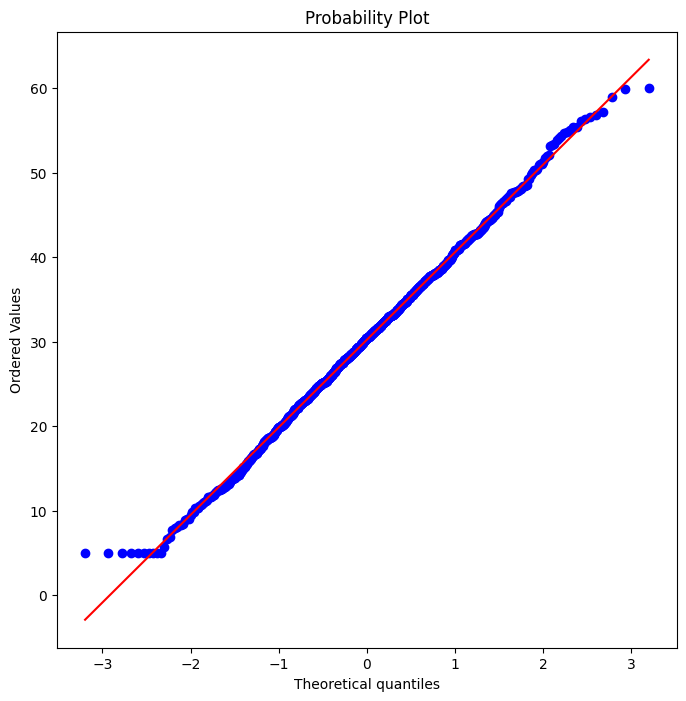

In [92]:
import scipy.stats as stats

plt.figure(figsize=(8,8))
stats.probplot(data['Study_Hours'],plot=plt)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [94]:
for col in ["Age",	"Heart_Rate",	"Blood_Pressure_Systolic",	"Blood_Pressure_Diastolic",	"Stress_Level_Biosensor",	"Stress_Level_Self_Report",	"Study_Hours",	"Project_Hours",]:
  print(f"{col} Median:{data[col].median()} Mean:{data[col].mean()}")

Age Median:21.0 Mean:20.96
Heart_Rate Median:70.33091631266505 Mean:70.10186313605116
Blood_Pressure_Systolic Median:120.0516540221116 Mean:119.83537975629382
Blood_Pressure_Diastolic Median:79.65173795067665 Mean:79.85475583695947
Stress_Level_Biosensor Median:5.368891393804134 Mean:5.483909405211376
Stress_Level_Self_Report Median:5.234888981461642 Mean:5.361600567638255
Study_Hours Median:30.432767148778943 Mean:30.22703715742624
Project_Hours Median:14.76587283717124 Mean:14.887368383808761


In [95]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [96]:
data['Physical_Activity'] = le.fit_transform(data['Physical_Activity'])
data['Sleep_Quality'] = le.fit_transform(data['Sleep_Quality'])
data['Mood'] = le.fit_transform(data['Mood'])
data['Health_Risk_Level'] = le.fit_transform(data['Health_Risk_Level'])

In [97]:
data.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,1,50.663217,122.173015,84.419860,3.137350,9.028669,0,1,0,34.520973,16.800956,2
1,2,21,0,57.926042,110.778407,75.696145,3.699078,5.819697,2,0,2,16.763846,15.791154,2
2,3,22,1,59.294219,109.375673,83.803814,6.785156,5.892360,1,1,0,44.203798,25.678437,2
3,4,24,1,76.826232,125.142227,78.091587,6.408509,6.884001,0,2,0,21.776645,20.808391,0
4,5,20,1,68.342769,107.515592,80.674937,7.264719,4.483450,2,2,0,8.964999,15.194045,2


In [98]:
data['Work_Hour'] = data['Project_Hours'] + data['Study_Hours']

In [99]:
data.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level,Work_Hour
0,1,24,1,50.663217,122.173015,84.419860,3.137350,9.028669,0,1,0,34.520973,16.800956,2,51.321929
1,2,21,0,57.926042,110.778407,75.696145,3.699078,5.819697,2,0,2,16.763846,15.791154,2,32.555000
2,3,22,1,59.294219,109.375673,83.803814,6.785156,5.892360,1,1,0,44.203798,25.678437,2,69.882236
3,4,24,1,76.826232,125.142227,78.091587,6.408509,6.884001,0,2,0,21.776645,20.808391,0,42.585036
4,5,20,1,68.342769,107.515592,80.674937,7.264719,4.483450,2,2,0,8.964999,15.194045,2,24.159044


In [100]:
correlation = data.corr()

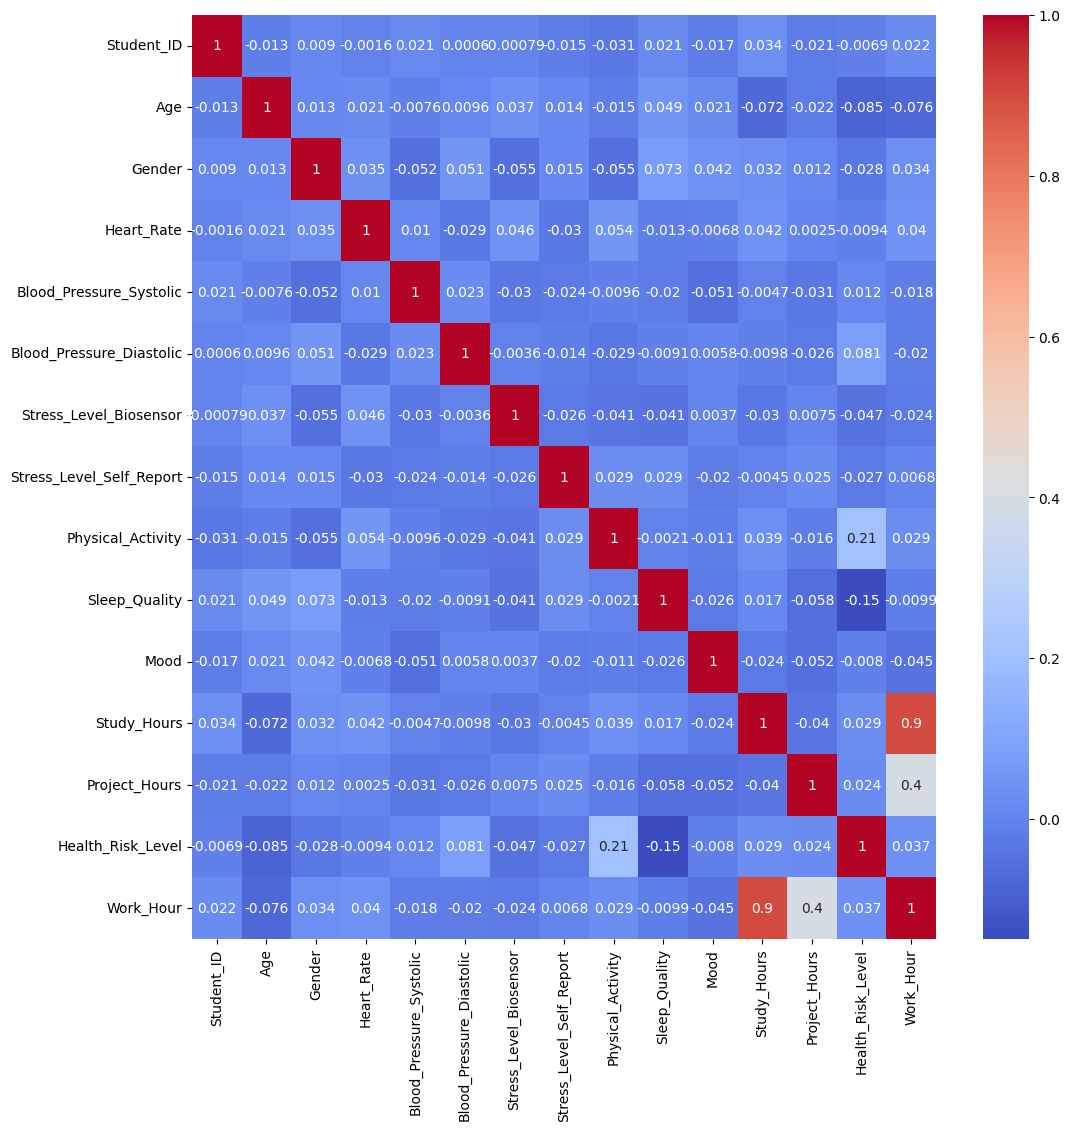

In [101]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [102]:
x = data.drop(columns=['Student_ID','Health_Risk_Level','Study_Hours','Project_Hours','Age'])
y = data['Health_Risk_Level']

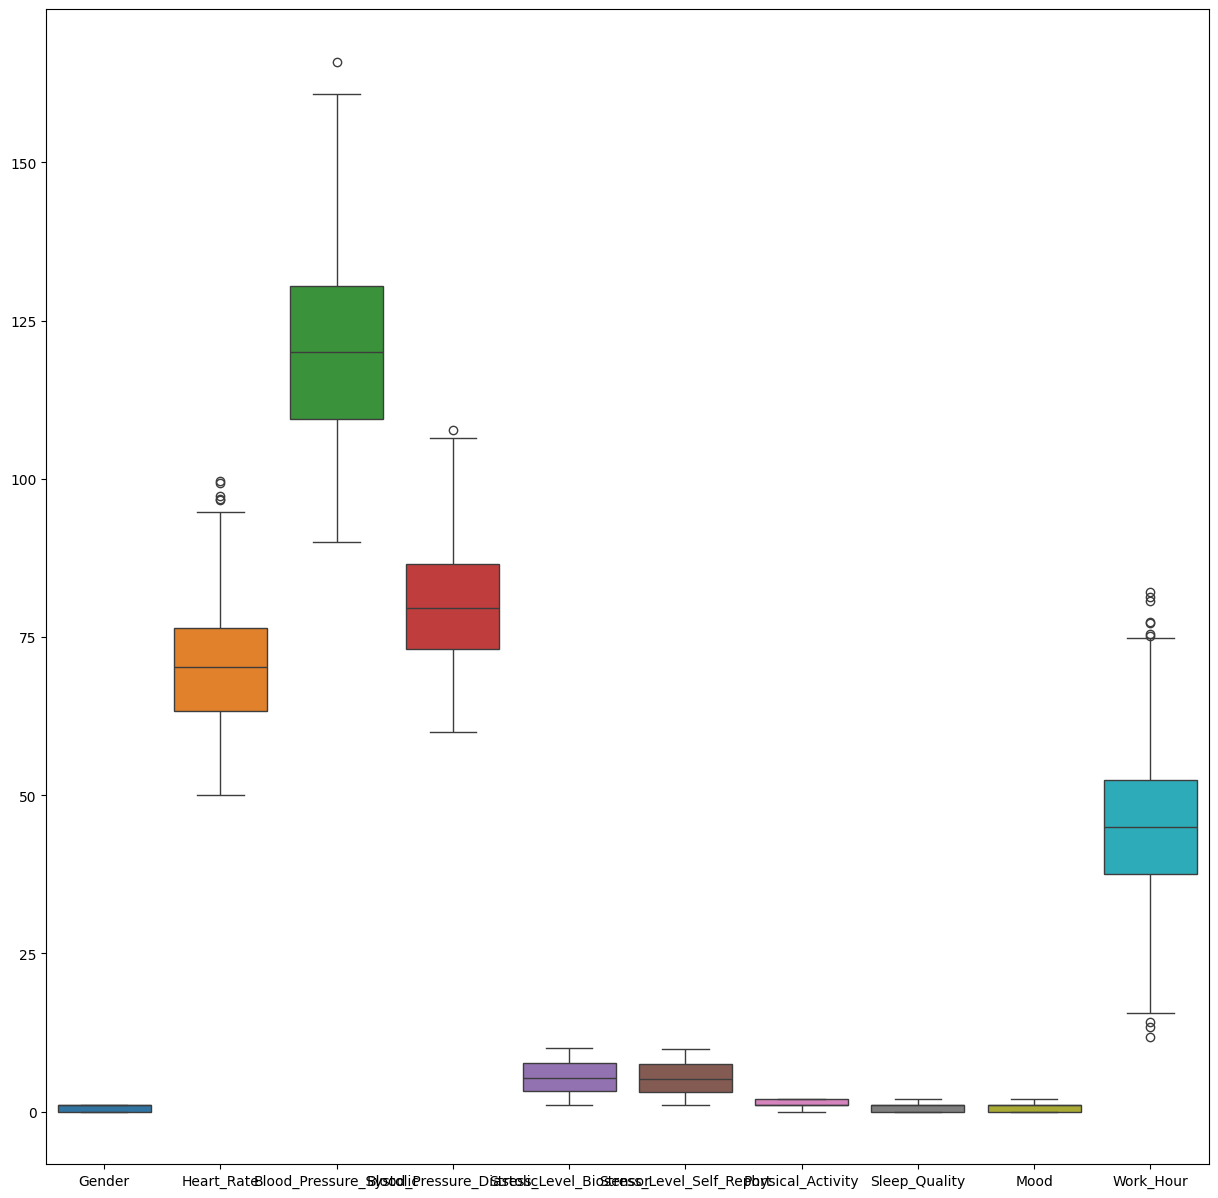

In [103]:
plt.figure(figsize=(15,15))
sns.boxplot(data=x)
plt.show()

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [105]:
models = {
    "SVM": SVC(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
}

In [106]:
results = {}

In [107]:
print("\n--- Performing 5-fold Cross-Validation for Model Selection ---")
for name, model in models.items():
    # Use cross_val_score to get scores for 5 folds
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f} (Std: {cv_scores.std():.4f})")


--- Performing 5-fold Cross-Validation for Model Selection ---
SVM: Mean Accuracy = 0.4612 (Std: 0.0408)
Random Forest: Mean Accuracy = 0.9862 (Std: 0.0108)


/tmp/ipython-input-3779676362.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


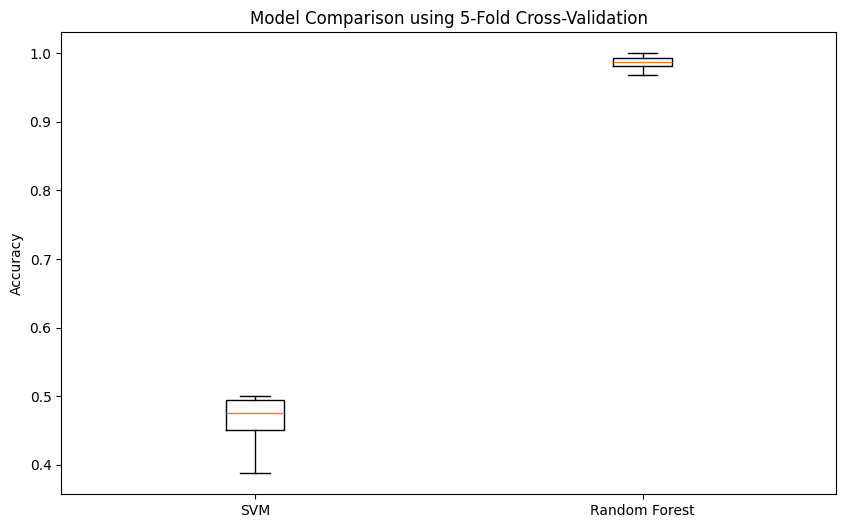

In [108]:
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Model Comparison using 5-Fold Cross-Validation')
plt.ylabel('Accuracy')
plt.show()

In [109]:
rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")

In [110]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [111]:
test = rf.predict(x_test)

In [112]:
test

array([0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0,
       2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       1, 1])

In [113]:
confusion_matrix(test,y_test)

array([[ 30,   0,   0],
       [  0,  46,   0],
       [  2,   1, 121]])

In [114]:
print(accuracy_score(test,y_test)*100)

98.5


In [115]:
f1_score(test,y_test,average=None)

array([0.96774194, 0.98924731, 0.9877551 ])

In [116]:
import joblib

In [117]:
joblib.dump(rf,"Random_Forest.pkl")

['Random_Forest.pkl']